In [1]:
!pwd

/Users/furkancetukkaya/Projects/nosql-fastapi-scrape/nbs


In [2]:
cd /Users/furkancetukkaya/Projects/nosql-fastapi-scrape

/Users/furkancetukkaya/Projects/nosql-fastapi-scrape


In [3]:
from bs4 import BeautifulSoup
from app import scraper
from slugify import slugify
import pprint
import re

In [4]:
url = "https://www.amazon.com/Vitamix-56085-48-Ounce-Container/dp/B00JLG0UL8/ref=sr_1_3?crid=2HSE34WVNK3T9&keywords=vitamix&qid=1683726443&s=kitchen-intl-ship&sprefix=vitamix%2Ckitchen-intl-ship%2C185&sr=1-3&th=1"

In [5]:
s = scraper.Scraper(url=url, endless_scroll=True)

'<html lang="en-us" class=" a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-hires a-transform3d a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition null" data-19ax5a9jf="dingo" data-aui-build-date="3.23.1-2023-05-14"><!-- sp:feature:head-start --><head><style class="vjs-styles-defaults">\n      .video-js {\n        width: 300px;\n        height: 150px;\n      }\n\n      .vjs-fluid {\n        padding-top: 56.25%\n      }\n    </style><style class="vjs-styles-dimensions">\n      .detail-player-53905098-9ff6-46d6-912f-d289104684ad-container-element-dimensions {\n        width: 300px;\n        height: 168.75px;\n      }\n\n      .detail-player-53905098-9ff6-46d6-912f-d289104684ad-container-element-dimensions.vjs-fluid {\n        padding-top: 56.25%;\n      }\n    </style><style class="vjs-styles-dimensions">\n      .
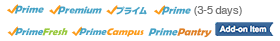
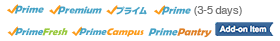

In [6]:
s.get()

In [7]:
html_str = s.get()

In [28]:
html_str

'<html lang="en-us" class=" a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-hires a-transform3d -scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition a-ember" data-19ax5a9jf="dingo" data-aui-build-date="3.23.1-2023-04-28"><!-- sp:feature:head-start --><head><script async="" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js" crossorigin="anonymous"></script><style class="vjs-styles-defaults">\n      .video-js {\n        width: 300px;\n        height: 150px;\n      }\n\n      .vjs-fluid {\n        padding-top: 56.25%\n      }\n    </style><style class="vjs-styles-dimensions">\n      .detail-player-8f18c4a1-feae-4b83-99f7-aab559a897e2-container-element-dimensions {\n        width: 300px;\n        height: 168.75px;\n      }\n\n      .detail-player-8f18c4a1-feae-4b83-99f7-aab559a897e2-conta

In [29]:
soup = BeautifulSoup(html_str)

In [30]:
soup

<html class="a-js a-audio a-video a-canvas a-svg a-drag-drop a-geolocation a-history a-webworker a-autofocus a-input-placeholder a-textarea-placeholder a-local-storage a-gradients a-hires a-transform3d -scrolling a-text-shadow a-text-stroke a-box-shadow a-border-radius a-border-image a-opacity a-transform a-transition a-ember" data-19ax5a9jf="dingo" data-aui-build-date="3.23.1-2023-04-28" lang="en-us"><!-- sp:feature:head-start --><head><script async="" crossorigin="anonymous" src="https://images-na.ssl-images-amazon.com/images/I/31bJewCvY-L.js"></script><style class="vjs-styles-defaults">
      .video-js {
        width: 300px;
        height: 150px;
      }

      .vjs-fluid {
        padding-top: 56.25%
      }
    </style><style class="vjs-styles-dimensions">
      .detail-player-8f18c4a1-feae-4b83-99f7-aab559a897e2-container-element-dimensions {
        width: 300px;
        height: 168.75px;
      }

      .detail-player-8f18c4a1-feae-4b83-99f7-aab559a897e2-container-element-dime

In [237]:
def extract_element_price_text(soup):
    el = soup.find('span', {'class': 'a-offscreen'})
    return el.text

In [238]:
extract_element_price_text(soup)

'$149.95'

In [46]:
price_str = soup.find('span', {'class': 'a-offscreen'}).text

In [47]:
price_str

'$149.95'

In [239]:
def extract_element_title_text(soup):
    el = soup.find('h1', {'class': 'a-size-large a-spacing-none',"id": "title"}).text
    return el.strip(" ")

In [240]:
extract_element_title_text(soup)

'Vitamix Container, 48 oz., Clear - 56085'

In [56]:
title_str =  soup.find('h1', {'class': 'a-size-large a-spacing-none',"id": "title"}).text.strip(" ")

In [57]:
title_str

'Vitamix Container, 48 oz., Clear - 56085'

In [82]:
tables = soup.find('table', {'class': 'a-keyvalue prodDetTable',"id": "productDetails_detailBullets_sections1","role":"presentation" })

In [177]:
def extract_tables(soup):
    return soup.find('table', {'class': 'a-keyvalue prodDetTable',"id": "productDetails_detailBullets_sections1","role":"presentation" })
    

In [178]:
extract_tables(soup)

<table class="a-keyvalue prodDetTable" id="productDetails_detailBullets_sections1" role="presentation"> <tbody><tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Brand </th> <td class="a-size-base prodDetAttrValue"> Vitamix </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Product Dimensions </th> <td class="a-size-base prodDetAttrValue"> 8"D x 10"W x 14"H </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Color </th> <td class="a-size-base prodDetAttrValue"> Clear </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Wattage </th> <td class="a-size-base prodDetAttrValue"> 30 watts </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Material </th> <td class="a-size-base prodDetAttrValue"> Polycarbonate </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Item Weight </th> <td class="a-size-base prodDetAttrValue"> 0.01 Ounces </td> 

In [83]:
type(tables)

bs4.element.Tag

In [138]:
for i in tables.tbody:
    print(i)

<tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Brand </th> <td class="a-size-base prodDetAttrValue"> Vitamix </td> </tr>
 
<tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Product Dimensions </th> <td class="a-size-base prodDetAttrValue"> 8"D x 10"W x 14"H </td> </tr>
 
<tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Color </th> <td class="a-size-base prodDetAttrValue"> Clear </td> </tr>
 
<tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Wattage </th> <td class="a-size-base prodDetAttrValue"> 30 watts </td> </tr>
 
<tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Material </th> <td class="a-size-base prodDetAttrValue"> Polycarbonate </td> </tr>
 
<tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Item Weight </th> <td class="a-size-base prodDetAttrValue"> 0.01 Ounces </td> </tr>
 
<tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Product Care Instructions

In [137]:
for i in tables.findChildren():
    print(i)

<tbody><tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Brand </th> <td class="a-size-base prodDetAttrValue"> Vitamix </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Product Dimensions </th> <td class="a-size-base prodDetAttrValue"> 8"D x 10"W x 14"H </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Color </th> <td class="a-size-base prodDetAttrValue"> Clear </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Wattage </th> <td class="a-size-base prodDetAttrValue"> 30 watts </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Material </th> <td class="a-size-base prodDetAttrValue"> Polycarbonate </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Item Weight </th> <td class="a-size-base prodDetAttrValue"> 0.01 Ounces </td> </tr> <tr> <th class="a-color-secondary a-size-base prodDetSectionEntry"> Product Care Instructions </th

In [171]:
dataset = {}
for table in tables.findChildren():
    for tbody in table.findChildren():
        row = []
        for col in tbody.findChildren():
            #print(col)
            row.append(col.text)
        #print(row)
        if len(row) != 2:
            continue
        key = row[0].strip()
        value = row[1].strip()
        #print(key,value)
        data = {}
        key = slugify(key)
        if key in dataset:
            continue
        else:
            dataset[key] = value
pprint.pprint(dataset)

{'1552-ratings': '1,552 ratings',
 'asin': 'B00JLG0UL8',
 'blade-material': 'Stainless Steel',
 'brand': 'Vitamix',
 'color': 'Clear',
 'country-of-origin': 'USA',
 'date-first-available': 'March 27, 2014',
 'domestic-shipping': 'Item can be shipped within U.S.',
 'included-components': 'Container',
 'is-discontinued-by-manufacturer': 'No',
 'is-dishwasher-safe': 'Yes',
 'item-model-number': '56085',
 'item-weight': '0.01 Ounces',
 'manufacturer': 'Vita-Mix Corporation',
 'material': 'Polycarbonate',
 'model-name': 'Vitamix Container, 48 oz.',
 'product-care-instructions': 'Dishwasher Safe',
 'product-dimensions': '8"D x 10"W x 14"H',
 'wattage': '30 watts'}


In [243]:
def extract_price_from_string(value: str, regex=r"[\$]{1}[\d,]+\.?\d{0,2}"):
    x = re.findall(regex, value)
    val = None
    if len(x) == 1:
        val = x[0]
    return val

In [249]:
def extract_dataset(tables):
    dataset = {}
    for table in tables.findChildren():
        for tbody in table.findChildren():
            row = []
            for col in tbody.findChildren():
                #print(col)
                row.append(col.text)
            #print(row)
            if len(row) != 2:
                continue
            key = row[0].strip()
            value = row[1].strip()
            #print(key,value)
            data = {}
            key = slugify(key)
            if key in dataset:
                continue
            else:
                if "$" in value:
                    new_key = key
                    old_key = f'{key}_raw'
                    new_value = extract_price_from_string(value)
                    old_value = value
                    dataset[new_key] = new_value
                    dataset[old_key] = old_value
                else:
                    dataset[key] = value
        return dataset 

In [250]:
dataset = extract_dataset(tables)
pprint.pprint(dataset)

{'1552-ratings': '1,552 ratings',
 'asin': 'B00JLG0UL8',
 'blade-material': 'Stainless Steel',
 'brand': 'Vitamix',
 'color': 'Clear',
 'country-of-origin': 'USA',
 'date-first-available': 'March 27, 2014',
 'domestic-shipping': 'Item can be shipped within U.S.',
 'included-components': 'Container',
 'is-discontinued-by-manufacturer': 'No',
 'is-dishwasher-safe': 'Yes',
 'item-model-number': '56085',
 'item-weight': '0.01 Ounces',
 'manufacturer': 'Vita-Mix Corporation',
 'material': 'Polycarbonate',
 'model-name': 'Vitamix Container, 48 oz.',
 'product-care-instructions': 'Dishwasher Safe',
 'product-dimensions': '8"D x 10"W x 14"H',
 'wattage': '30 watts'}
